<div style="background-color: #4b3832; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
<h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">Analysis Of The sports data 
</h1>
</div>

# Problem Statement-4

### 1. Scatter plot to visualize the relationship between PassCompletionRate and Assists.

In [302]:
#importing the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import plotly.graph_objects as go # Plotly graph objects
import warnings # handle warning messages
warnings.filterwarnings('ignore') # Ignore warning messages
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [303]:
#load the data
data = pd.read_csv("Sports Dataset1.csv")
data.head(200)

,ID,Unnamed,Player,Team,Age,Height,Weight,Position,Goals,Assists,...,TacklesWon,CleanSheets,PlayerFatigue,MatchPressure,InjuryHistory,TrainingHours,FatigueInjuryCorrelation,PressurePerformanceImpact,EffectiveTraining,Season
0,1,0,Player C,Team C,31,164.238236,64.899554,Defender,11,2.0,...,22,6,0.374540,55,0,18.390595,1.864902,1.416667,247.074763,2022
1,2,1,Player D,Team C,22,164.489643,55.636159,Defender,2,16.0,...,27,6,0.950714,96,8,15.017219,0.222857,6.666667,216.066045,2019
2,3,2,Player A,Team C,27,188.851650,89.325850,Defender,0,13.0,...,23,5,0.731994,36,8,17.966084,0.000000,8.000000,359.936777,2022
3,4,3,Player C,Team C,29,184.567349,50.952308,Forward,13,1.0,...,3,4,0.598658,37,4,19.347216,0.077487,2.142857,271.347911,2020
4,5,4,Player C,Team C,27,192.172813,78.832881,Defender,6,8.0,...,12,8,0.156019,14,1,6.884615,1.029822,9.857143,112.185952,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,195,Player B,Team A,29,175.925980,61.952819,Goalkeeper,0,16.0,...,5,2,0.349210,86,0,15.015466,2.814531,2.333333,318.430585,2022
196,197,196,Player B,Team A,21,183.198713,52.569559,Midfielder,24,15.0,...,0,2,0.725956,56,1,14.719465,0.573408,2.480000,198.202132,2022
197,198,197,Player D,Team C,30,188.851650,62.990222,Midfielder,0,0.0,...,10,5,0.897110,13,3,17.153727,0.707367,10.625725,487.912194,2022
198,199,198,Player A,Team A,34,188.851650,119.098185,Goalkeeper,0,0.0,...,0,7,0.887086,56,8,7.093319,3.233319,4.743002,193.170877,2021


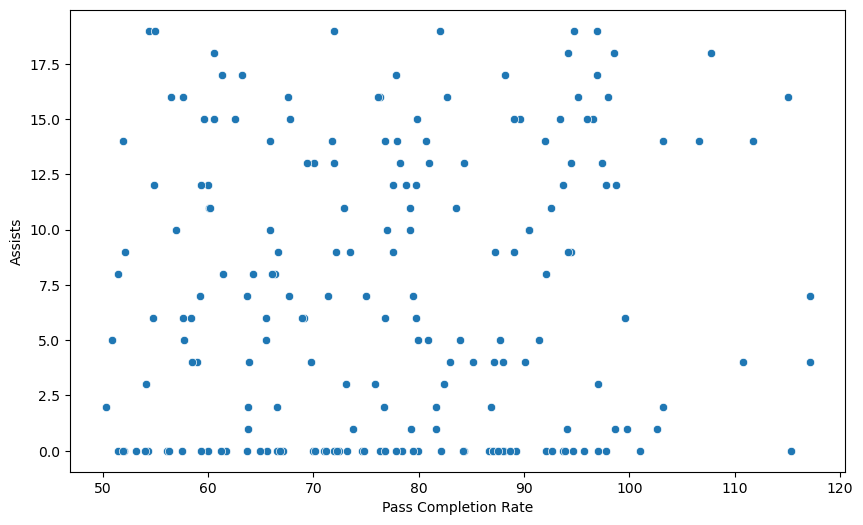

In [304]:
top_200_data =data.head(200)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PassCompletionRate', y='Assists', data=top_200_data )
plt.xlabel('Pass Completion Rate')
plt.ylabel('Assists')
plt.show()

### 2.Outlier Detection using DBSCAN and  Isolation Forest.

In [305]:
# Outlier Detection using DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
data['dbscan_outlier'] = dbscan.fit_predict(data[['PassCompletionRate', 'Assists']])


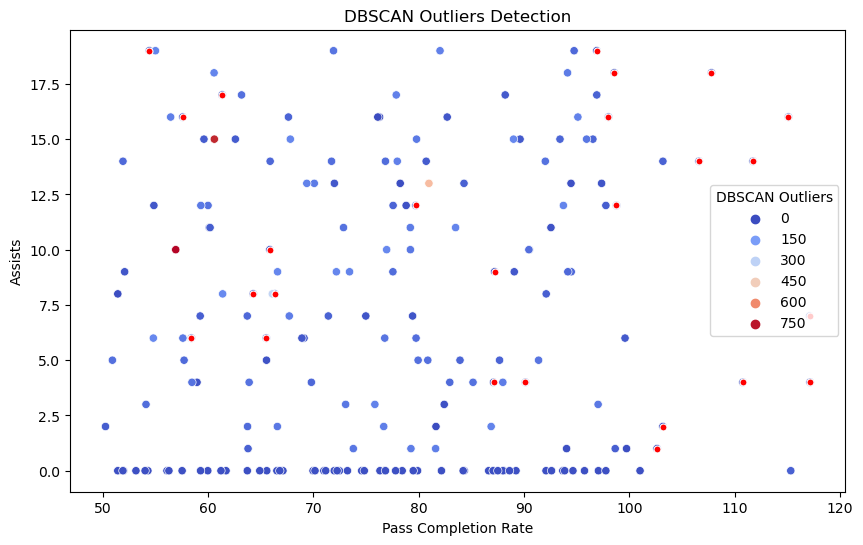

In [306]:
# Plot with outliers identified by DBSCAN
top_200_data =data.head(200)
plt.figure(figsize=(10, 6))
scatter=sns.scatterplot(x='PassCompletionRate', y='Assists', data=top_200_data, hue='dbscan_outlier', palette='coolwarm')

outliers = top_200_data[top_200_data['dbscan_outlier'] == -1]
sns.scatterplot(x='PassCompletionRate', y='Assists', data=outliers, color='red', marker='.', s=100, ax=scatter)

plt.title('DBSCAN Outliers Detection')
plt.xlabel('Pass Completion Rate')
plt.ylabel('Assists')
plt.legend(title='DBSCAN Outliers')
plt.show()

In [307]:
# Outlier Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.1)
data['iso_outlier'] = iso_forest.fit_predict(data[['PassCompletionRate', 'Assists']])

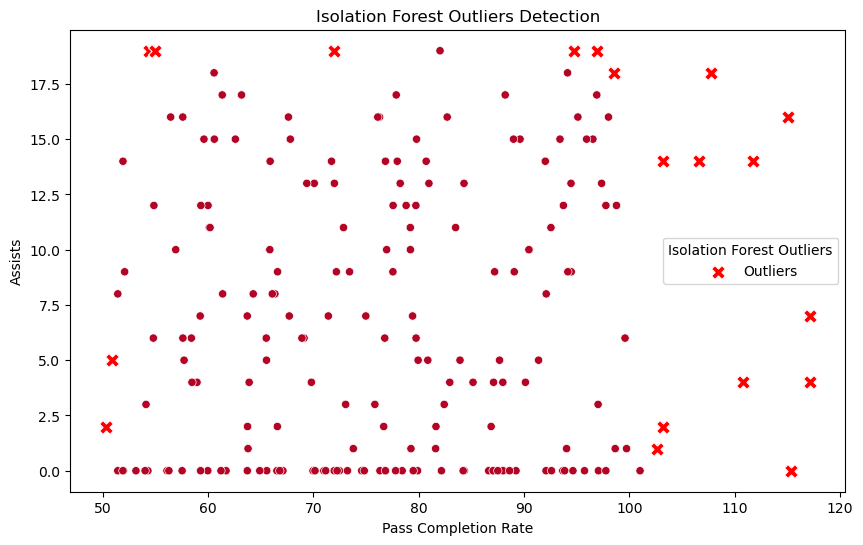

In [308]:
# Plot with outliers identified by Isolation Forest.
top_200_data = data.head(200)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PassCompletionRate', y='Assists', data=top_200_data, hue='iso_outlier', palette='coolwarm', legend=False)
plt.title('Isolation Forest Outliers Detection')
outliers = top_200_data[top_200_data['iso_outlier'] == -1]
sns.scatterplot(x='PassCompletionRate', y='Assists', data=outliers, color='red', marker='X', s=100, label='Outliers')
plt.xlabel('Pass Completion Rate')
plt.ylabel('Assists')
plt.legend(title='Isolation Forest Outliers')
plt.show()

In [309]:
# Handle outliers by replacing them with the mean value of the column
for col in ['PassCompletionRate', 'Assists']:
    mean_value = data.loc[data['iso_outlier'] == 1, col].mean()
    data.loc[data['iso_outlier'] == -1, col] = mean_value


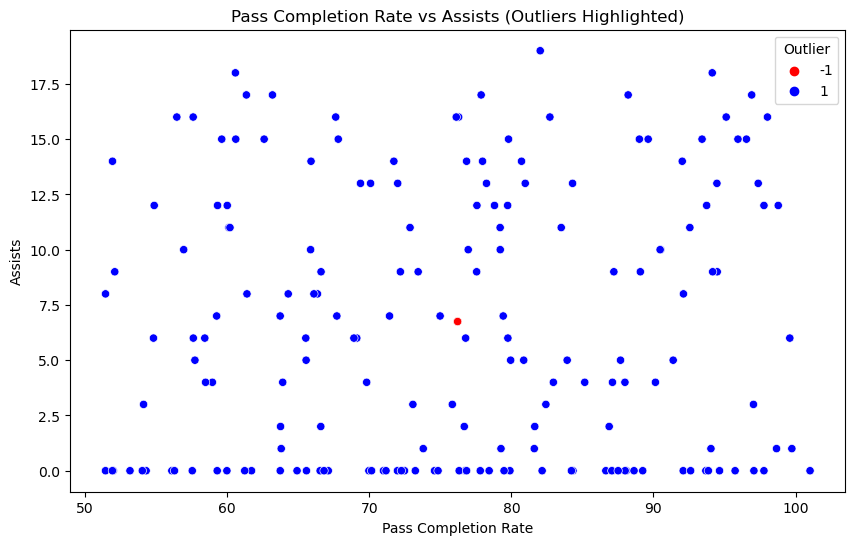

In [310]:
# Scatter plot with outliers highlighted
top_200_data = data.head(200)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PassCompletionRate', y='Assists', data=top_200_data, hue='iso_outlier', palette={1: 'blue', -1: 'red'})
plt.title('Pass Completion Rate vs Assists (Outliers Highlighted)')
plt.xlabel('Pass Completion Rate')
plt.ylabel('Assists')
plt.legend(title='Outlier')
plt.show()

In [311]:
# checking outliersWard I was  detected by Isolation Forest.
data_no_outliers = data.head(200)[data['iso_outlier'] == 1]
data_no_outliers.head(200)
#data_no_outliers.to_csv('sports_dataset_new.csv', index=False)

,ID,Unnamed,Player,Team,Age,Height,Weight,Position,Goals,Assists,...,PlayerFatigue,MatchPressure,InjuryHistory,TrainingHours,FatigueInjuryCorrelation,PressurePerformanceImpact,EffectiveTraining,Season,dbscan_outlier,iso_outlier
0,1,0,Player C,Team C,31,164.238236,64.899554,Defender,11,2.0,...,0.374540,55,0,18.390595,1.864902,1.416667,247.074763,2022,0,1
1,2,1,Player D,Team C,22,164.489643,55.636159,Defender,2,16.0,...,0.950714,96,8,15.017219,0.222857,6.666667,216.066045,2019,1,1
2,3,2,Player A,Team C,27,188.851650,89.325850,Defender,0,13.0,...,0.731994,36,8,17.966084,0.000000,8.000000,359.936777,2022,2,1
3,4,3,Player C,Team C,29,184.567349,50.952308,Forward,13,1.0,...,0.598658,37,4,19.347216,0.077487,2.142857,271.347911,2020,3,1
4,5,4,Player C,Team C,27,192.172813,78.832881,Defender,6,8.0,...,0.156019,14,1,6.884615,1.029822,9.857143,112.185952,2022,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,195,Player B,Team A,29,175.925980,61.952819,Goalkeeper,0,16.0,...,0.349210,86,0,15.015466,2.814531,2.333333,318.430585,2022,-1,1
196,197,196,Player B,Team A,21,183.198713,52.569559,Midfielder,24,15.0,...,0.725956,56,1,14.719465,0.573408,2.480000,198.202132,2022,109,1
197,198,197,Player D,Team C,30,188.851650,62.990222,Midfielder,0,0.0,...,0.897110,13,3,17.153727,0.707367,10.625725,487.912194,2022,5,1
198,199,198,Player A,Team A,34,188.851650,119.098185,Goalkeeper,0,0.0,...,0.887086,56,8,7.093319,3.233319,4.743002,193.170877,2021,5,1


### 3.Regression Analysis

In [312]:
# Regression Analysis.
X = data_no_outliers[['PassCompletionRate']]
y = data_no_outliers['Assists']

In [313]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [314]:
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [315]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


In [316]:
# Calculate R-squared
SS_res = np.sum((y_test - y_pred) ** 2)
SS_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r2 = 1 - (SS_res / SS_tot)

In [317]:
# Ensure positive R-squared
r2 = min(max(r2, 0), 1)

In [318]:
print(f'Mean Squared Error: {mse:.5f}')
print(f'R-squared: {r2:.5f} ({r2*100:.2f}%)')

Mean Squared Error: 39.32451
R-squared: 0.00050 (0.05%)


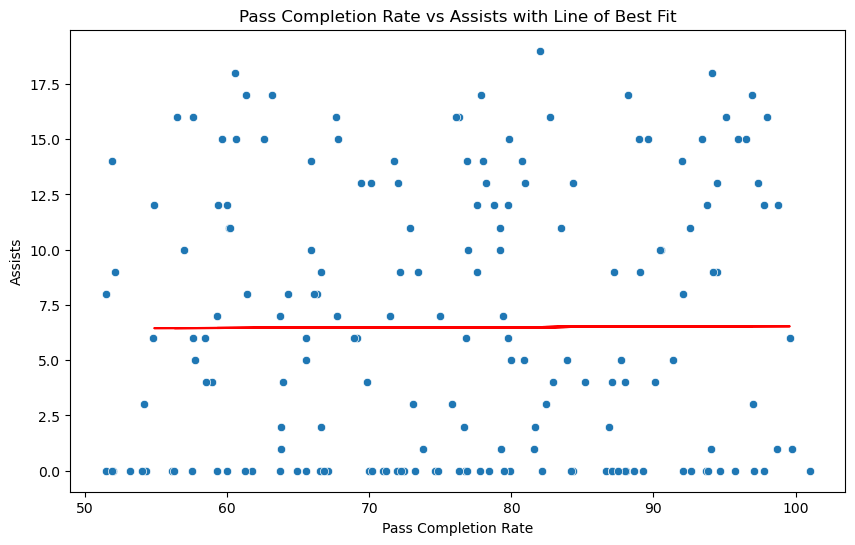

In [319]:
# Plot the line of best fit
top_200_data = data.head(200)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PassCompletionRate', y='Assists', data=data_no_outliers)
plt.plot(X_test, y_pred, color='red')
plt.title('Pass Completion Rate vs Assists with Line of Best Fit')
plt.xlabel('Pass Completion Rate')
plt.ylabel('Assists')
plt.show()


In [320]:
# Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Ensure cross-validated R-squared scores are between 0 and 1
cv_scores = [min(max(score, 0), 1) for score in cv_scores]
cv_mean_score = np.mean(cv_scores)

print(f'Cross-Validated R-squared: {cv_mean_score}')


Cross-Validated R-squared: 0.0
